# Libraries & Global variables

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import cv2
import json

import os
import time

# from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
import importlib
import Text_base_model_tools as tbm
importlib.reload(tbm)

# import nltk
# nltk.download('popular', quiet = True)


<module 'Text_base_model_tools' from 'C:\\Ramiro\\Data Science\\0_DataScientest\\02_DS_project\\jun23_bdsi_rakuten_solo\\notebooks\\Text_base_model_tools.py'>

In [2]:
## define general parameters

myseed = 123

splitting_path = '../Splitted_datasets/'
preprocessing_path = '../Preprocessed_data/'
training_path = '../Trained_models_and_metrics/'
base_text_path = '../Base_models/Text/'


In [3]:
from datetime import date, datetime

def date_time():
    '''
    get date and time in string format '_yymmdd_hhmm'
    at the moment the function is called.
    '''
    from datetime import date, datetime
    
    today = date.today()
    now = datetime.now() 

    return today.strftime("%Y%m%d")[2:] + now.strftime("%H%M")

## product categories

In [65]:
product_class = pd.read_csv('../datasets/product_class.csv', sep = ';')
print(product_class.shape)
product_class

(27, 3)


,target,prdtypecode,prodtype
0,0,10,livres_adulte
1,24,40,jeux_videos_import
2,25,50,accessoires_jeux_videos
3,26,60,jeux_et_consoles_retro
4,1,1140,goodies_geek
5,2,1160,cartes_a_jouer
6,3,1180,figurines_wargames
7,4,1280,jouets_enfance
8,5,1281,jeux_societe
9,6,1300,modeles_reduits_ou_telecommandes


# Reloading datasets: 

* Raw data after train - test splitting.   
* Transformed datasets into np.arrays and/or sparce matrices ready to feed into the ML models

## Raw datasets after train - test spliting (optional)

In [20]:
# df_X_train = pd.read_csv(splitting_path + '2308141811_df_X_train.csv', index_col = 0, header = 0)
# df_X_test = pd.read_csv(splitting_path + '2308141811_df_X_test.csv', index_col = 0, header = 0)
df_y_train = pd.read_csv(splitting_path + '2308141811_df_y_train.csv', index_col = 0, header = 0)
df_y_test = pd.read_csv(splitting_path + '2308141811_df_y_test.csv', index_col = 0, header = 0)

## Import transformed data to train models (required)
* Ready to feed into the ML models
* Below are the minimum necessary to run the model

**Features**

In [8]:
from scipy import sparse

text_data = {}

text_data['X_train'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_train.npz")
text_data['X_test'] = sparse.load_npz("../Preprocessed_data/2308141825_text_data_transformed_X_test.npz")

**Targets**

In [9]:
targets = {}
targets['y_train'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_train.npy")
targets['y_test'] = np.load("../Preprocessed_data/2308141825_text_data_transformed_y_test.npy")

**Transformers**

In [60]:
import joblib

# token_len_scaler = joblib.load("../Preprocessed_data/2308141825_token_len_scaler")
# language_encoder = joblib.load("../Preprocessed_data/2308141825_language_encoder")
# lemmas_vectorizer = joblib.load("../Preprocessed_data/2308141825_lemmas_vectorizer")
target_encoder = joblib.load("../Preprocessed_data/2308141825_target_encoder")

# 1- Random Forest

### Modeling

In [411]:
## rename the variable s to keep the conventions below. This does not make a copy of the data (just a new pointer)

X_train = text_data['X_train']
X_test = text_data['X_test']

y_train = df_y_train.squeeze()
y_test = df_y_test.squeeze()

In [412]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'scipy.sparse._coo.coo_matrix'>
<class 'scipy.sparse._coo.coo_matrix'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [413]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## estimator
rf_clf = RandomForestClassifier(n_jobs = -1, random_state = 123) # max_depth = 20, 

## GridSearch
# params = {'max_depth' : [60,70,80,90]} 

# grid_rf = GridSearchCV(estimator = rf_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1,\
#                        return_train_score=True, verbose = 2)

## training (timed)
t0 = time.time()

rf_clf.fit(X_train, y_train)
# grid_rf.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 67932 observations, training time = 57.01 seconds
2308181749


In [156]:
rf_clf.get_params()
# grid_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

**Grid optimization (skip for single estimator)** 

In [51]:
## Best estimators
print("Best estimator:", grid_rf.best_params_)


## Grid evaluation:
to_display = ['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']
grid_rf_optimization = pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:,to_display]
#print(grid_rf_optimization)


## export grid_cv_results
export = False
time_stamp = model_date_time
if export:
    filename = training_path + time_stamp + '_grid_rf_cv_results' + '.csv'
    pd.DataFrame.from_dict(grid_rf.cv_results_).to_csv(filename, header=True, index=False)
    print(filename)

Best estimator: {'max_depth': 90}
../Trained_models_and_metrics/20230814_2159_grid_rf_cv_results.csv


In [45]:
## Formating into dataframe: 

for key in params.keys():
    grid_rf_optimization[key] = [val[key] for val in grid_rf_optimization['params']]

#grid_rf_optimization = grid_rf_optimization.drop('params', axis = 1)

grid_rf_optimization

,params,mean_test_score,std_test_score,mean_train_score,std_train_score,max_depth
0,{'max_depth': 60},0.705191,0.003330,0.828829,0.001555,60
1,{'max_depth': 70},0.713066,0.002463,0.845562,0.000962,70
2,{'max_depth': 80},0.717718,0.001581,0.859179,0.000241,80
3,{'max_depth': 90},0.722620,0.001851,0.872578,0.001564,90


**Plot optimization of current model  (skip for single estimator)**

Text(0.5, 0.98, 'Optimization: Random Forest on meanRGB')

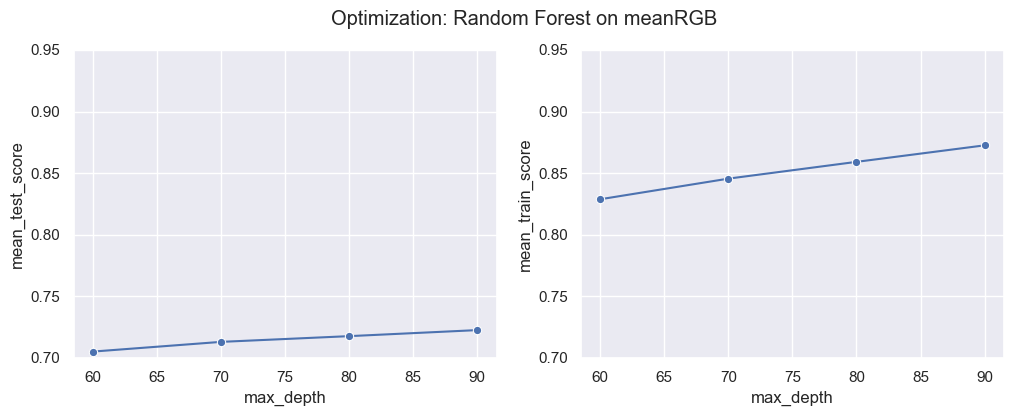

In [48]:
fig, axs = plt.subplots(1,2,figsize = (12,4))
#sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, hue = 'criterion', style='max_features', marker = 'o')


sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[0])

# sns.lineplot(x = 'max_depth', y='mean_test_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[0], ls = ':', palette="crest")


sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_optimization, \
             marker = 'o', ax= axs[1])

# sns.lineplot(x = 'max_depth', y='mean_train_score', data = grid_rf_v0, hue = 'C',\
#              marker = '*', ax= axs[1], ls = ':', palette="crest")

for ax in axs:
    ax.set_ylim(0.7,0.95)
#     ax.set_xscale("log")
#     leg = ax.legend()
#     leg_lines = leg.get_lines()
# #     leg_lines[1].set_linestyle(":")
#     leg_lines[2].set_linestyle(":")
#     leg_lines[3].set_linestyle(":")
    
#plt.legend(title='Day of Week')
# plt.legend(labels = ['a', 'F', 'S', 'y'])
fig.suptitle("Optimization: Random Forest on meanRGB")

**Train-Test accuracy**

In [414]:
t0 = time.time()
rf_accuracy_train = rf_clf.score(X_train, y_train)
# rf_accuracy_train = grid_rf.score(X_train, y_train)

t1 = time.time()
rf_accuracy_test = rf_clf.score(X_test, y_test)
# rf_accuracy_test = grid_rf.score(X_test, y_test)

t2 = time.time()

print("Train set accuracy %0.3f. Scoring done in %0.2f seconds" %(rf_accuracy_train, (t1-t0))  )
print("Test  set accuracy %0.3f. Scoring done in %0.2f seconds" %(rf_accuracy_test, (t2-t1))  )

Train set accuracy 0.977. Scoring done in 1.17 seconds
Test  set accuracy 0.751. Scoring done in 0.31 seconds


**Predictions**

In [415]:
t0 = time.time()

y_pred = rf_clf.predict(X_test)
# y_pred = grid_rf.predict(X_test)

t1 = time.time()

print("Predictions made in %0.2f seconds"%(t1-t0))

Predictions made in 0.33 seconds


In [416]:
categories = product_class['prdtypecode'].tolist()

yy_pred = pd.Categorical(y_pred, categories = categories)
yy_test = pd.Categorical(y_test, categories = categories)

cm = pd.crosstab(yy_test, yy_pred, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


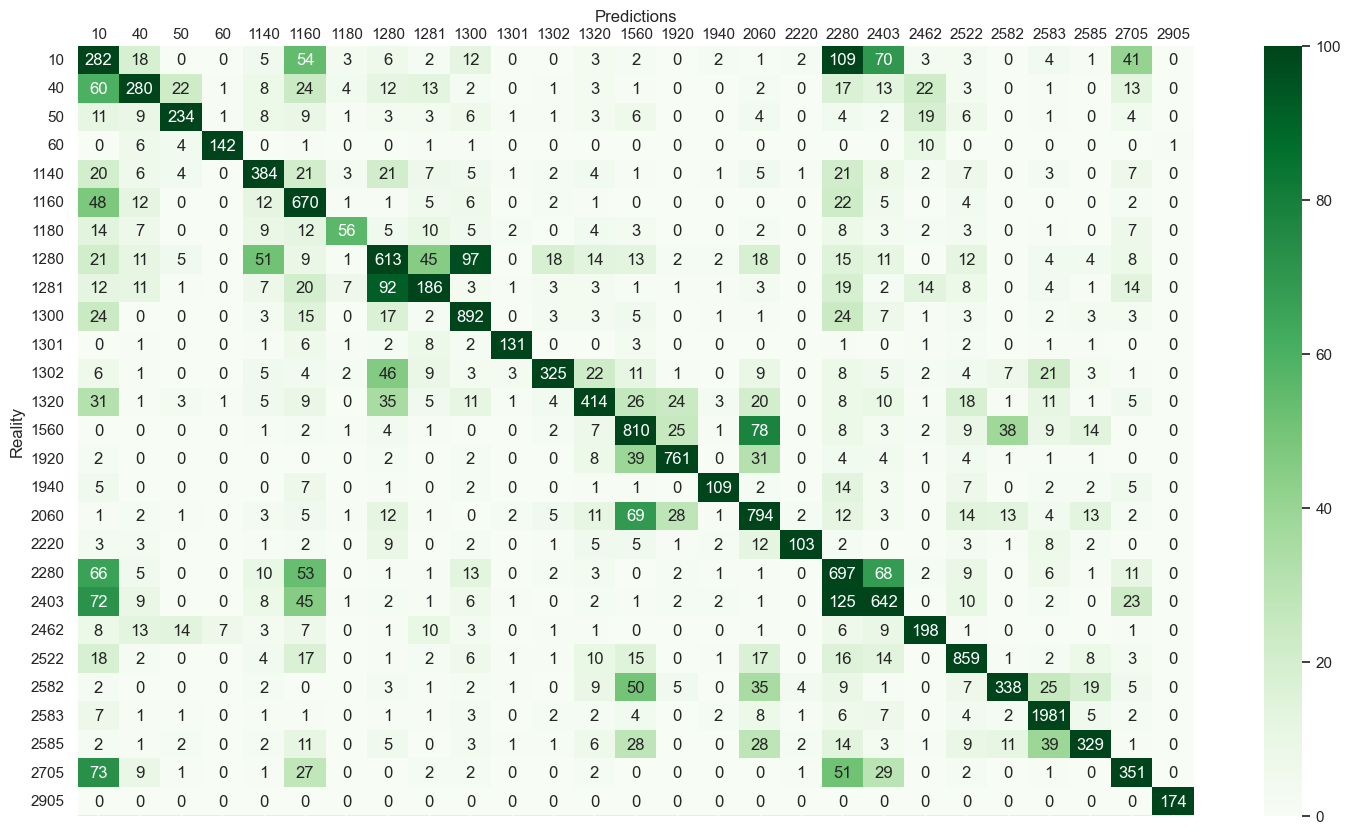

In [144]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [145]:
export = False

if export:
    filename = base_text_path + model_date_time + '_text_rf' + '_confusionMatrix.csv'
    
    with open(filename, 'w') as file:
        cm.to_csv(filename, header = True, index = True)
        print(filename)

../Base_models/Text/2308181133_text_rf_confusionMatrix.csv


**Classification Report: macro & micro**

In [417]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_rf = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [418]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.36      0.45      0.40       623
          40       0.69      0.56      0.62       502
          50       0.80      0.70      0.75       336
          60       0.93      0.86      0.89       166
        1140       0.72      0.72      0.72       534
        1160       0.65      0.85      0.74       791
        1180       0.68      0.37      0.48       153
        1280       0.68      0.63      0.66       974
        1281       0.59      0.45      0.51       414
        1300       0.82      0.88      0.85      1009
        1301       0.90      0.81      0.85       161
        1302       0.87      0.65      0.75       498
        1320       0.77      0.64      0.70       648
        1560       0.74      0.80      0.77      1015
        1920       0.89      0.88      0.89       861
        1940       0.84      0.68      0.75       161
        2060       0.74      0.79      0.77       999
        2220       0.89    

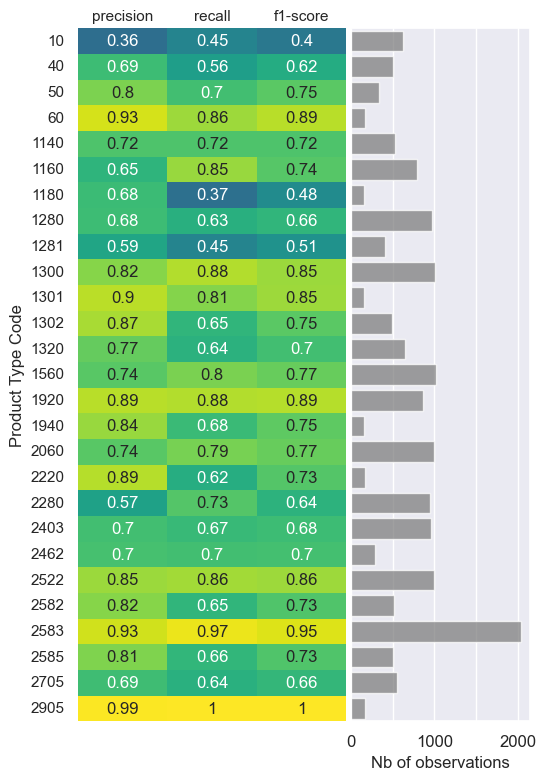

In [47]:
import FusionModel_tools as fm

fm.plot_classificationReport(micro_rf)

**Top Classified Categories**

In [151]:
micro_rf.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
26,2905,0.994286,1.000000,0.997135,174.0
23,2583,0.928739,0.970127,0.948982,2042.0
3,60,0.934211,0.855422,0.893082,166.0
14,1920,0.893192,0.883856,0.888500,861.0
21,2522,0.849654,0.860721,0.855152,998.0


**Worst Classified Categories**

In [152]:
micro_rf.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
0,10,0.357868,0.452648,0.399717,623.0
6,1180,0.682927,0.366013,0.476596,153.0
8,1281,0.588608,0.449275,0.509589,414.0
1,40,0.686275,0.557769,0.615385,502.0
18,2280,0.571311,0.732143,0.641805,952.0


**Less represented categories scores**

In [153]:
micro_rf.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.682927,0.366013,0.476596,153.0
10,1301,0.897260,0.813665,0.853420,161.0
15,1940,0.844961,0.677019,0.751724,161.0
17,2220,0.887931,0.624242,0.733096,165.0
3,60,0.934211,0.855422,0.893082,166.0


**Save Classification Report**

In [154]:
export = True

if export:
    filename = base_text_path + model_date_time +'_text_rf' + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

../Base_models/Text/2308181133_text_rf_classificationReport.txt


**Save trained model**

In [164]:
save = True
reload = False

saved_model = base_text_path + model_date_time + '_rf_trained' + '.joblib'

from joblib import dump, load

if save:
    dump(svc_clf, saved_model) #
    print("Saved trained model:", saved_model)
    
if reload:
    svc_clf=load(saved_model)
    print("reloaded model: ", saved_model)

Saved trained model: ../Base_models/Text/2308181133_rf_trained.joblib


### Extra properties of the fitted random forest

In [34]:
## maximum tree depth in the forest
max((e.tree_.max_depth for e in rf_clf.estimators_))

1019

In [138]:
# rf_clf.estimators_
# rf_clf.n_classes_

**feature importances**

In [58]:
start_time = time.time()
importances = rf_clf.feature_importances_
std = np.std([ tree.feature_importances_ for tree in rf_clf.estimators_ ], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.079 seconds


In [122]:
## define names of my features:

language_features = ['is_'+ lang for lang in list(language_encoder.categories_[0])]

token_features = [ "says_" + term for term in sorted(lemmas_vectorizer.vocabulary_)]

feature_names = ['token_length'] + language_features + token_features

print(feature_names[:100])

34
['token_length', 'is_af', 'is_an', 'is_br', 'is_ca', 'is_cy', 'is_da', 'is_de', 'is_en', 'is_eo', 'is_es', 'is_et', 'is_eu', 'is_fi', 'is_fr', 'is_ga', 'is_ht', 'is_hu', 'is_id', 'is_it', 'is_jv', 'is_la', 'is_lb', 'is_lt', 'is_mg', 'is_nl', 'is_no', 'is_oc', 'is_pl', 'is_pt', 'is_qu', 'is_ro', 'is_sw', 'is_tl', 'is_wa', 'says_000', 'says_031', 'says_039', 'says_040', 'says_050', 'says_075', 'says_0mp', 'says_100', 'says_1000', 'says_100000', 'says_100cm', 'says_100e', 'says_100m', 'says_101', 'says_1010', 'says_102', 'says_103', 'says_104', 'says_105', 'says_106', 'says_107', 'says_108', 'says_1080p', 'says_109', 'says_10cm', 'says_10m', 'says_10mm', 'says_10pcs', 'says_110', 'says_1100', 'says_111', 'says_112', 'says_114', 'says_115', 'says_116', 'says_117', 'says_118', 'says_119', 'says_11cm', 'says_120', 'says_1200', 'says_120cm', 'says_120g', 'says_121', 'says_122', 'says_124', 'says_125', 'says_126', 'says_127', 'says_128', 'says_12cm', 'says_12v', 'says_130', 'says_132', 'say

In [119]:
forest_importances = pd.Series(importances, index=feature_names)
len(forest_importances)
# len(std)

In [136]:
## keep only the top most important features:

Ntop = 50
top_rf_importances = forest_importances.sort_values(ascending = False).head(Ntop)

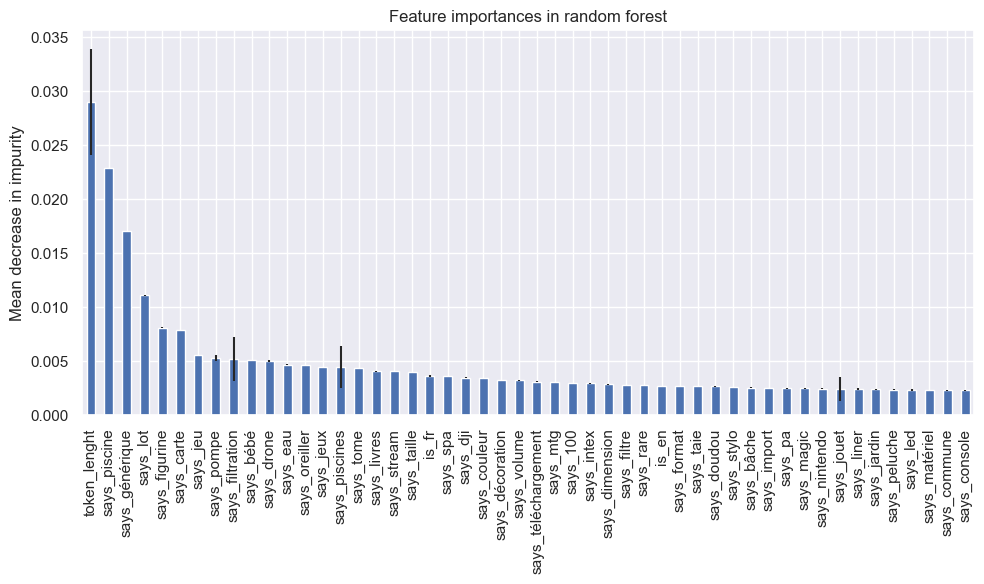

In [140]:
## plot:

fig, ax = plt.subplots(figsize = (10,6))
# forest_importances.plot.bar(yerr=std[:10], ax=ax)
top_rf_importances.plot.bar(yerr=std[:Ntop],ax=ax) #yerr=std[:10]
ax.set_title("Feature importances in random forest")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

### reload the results obtained from previous gridsearch optimization

In [15]:
grid1 = pd.read_csv('../Trained_models_and_metrics/20230814_2137_grid_rf_cv_results.csv')
grid2 = pd.read_csv('../Trained_models_and_metrics/20230814_2159_grid_rf_cv_results.csv')
grid = pd.concat([grid1, grid2], axis = 0)
display(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,48.404204,7.330111,13.917547,2.262934,25,{'max_depth': 25},0.612865,0.619195,0.621890,0.618431,...,0.619193,0.003665,4,0.682418,0.685767,0.686821,0.687686,0.684301,0.685399,0.001870
1,69.679783,1.195830,9.425628,0.694496,30,{'max_depth': 30},0.641496,0.646500,0.646916,0.648167,...,0.645867,0.002283,3,0.727795,0.726838,0.729032,0.728793,0.726640,0.727820,0.000977
2,95.710698,0.697699,6.371063,0.180753,40,{'max_depth': 40},0.670052,0.674174,0.670985,0.677536,...,0.674557,0.003798,2,0.778563,0.777072,0.775163,0.778254,0.779671,0.777745,0.001533
3,77.507888,19.222806,1.328273,1.648111,50,{'max_depth': 50},0.688231,0.692942,0.690711,0.692478,...,0.691795,0.002172,1,0.806735,0.807250,0.807014,0.806904,0.809278,0.807436,0.000936
0,210.792429,4.829162,14.236846,1.165027,60,{'max_depth': 60},0.699934,0.707367,0.702856,0.706683,...,0.705191,0.003330,4,0.830178,0.826921,0.826979,0.829647,0.830420,0.828829,0.001555
1,243.856799,2.520658,7.316849,0.707520,70,{'max_depth': 70},0.709134,0.715463,0.711320,0.714117,...,0.713066,0.002463,3,0.846518,0.843923,0.845067,0.846355,0.845950,0.845562,0.000962
2,260.191939,5.462178,8.290022,0.799254,80,{'max_depth': 80},0.716494,0.717671,0.715590,0.718828,...,0.717718,0.001581,2,0.859104,0.858865,0.859603,0.859106,0.859217,0.859179,0.000241
3,144.749005,66.643587,1.521736,1.936881,90,{'max_depth': 90},0.721498,0.724074,0.720006,0.722288,...,0.722620,0.001851,1,0.874671,0.870457,0.871104,0.873477,0.873183,0.872578,0.001564


Text(0.5, 0, 'hyperparameter "max_depth"')

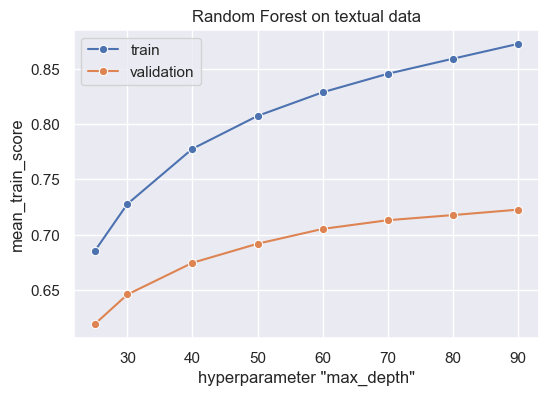

In [31]:
plt.figure(figsize = (6,4))

sns.lineplot(x = 'param_max_depth', y='mean_train_score', data = grid, marker = 'o', label = 'train')
sns.lineplot(x = 'param_max_depth', y='mean_test_score', data = grid, marker = 'o', label = 'validation')

plt.title("Random Forest on textual data", fontsize = 12)
plt.xlabel('hyperparameter "max_depth"')

# Support Vectors Machine - SVC

**It takes the same data as the other models**

## Modeling

In [411]:
## rename the variable s to keep the conventions below. This does not make a copy of the data (just a new pointer)

X_train = text_data['X_train']
X_test = text_data['X_test']

y_train = df_y_train.squeeze()
y_test = df_y_test.squeeze()

In [412]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'scipy.sparse._coo.coo_matrix'>
<class 'scipy.sparse._coo.coo_matrix'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


**intantiate model**

In [157]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

## estimator
svc_clf = svm.SVC(random_state = myseed) # kernel = 'poly', gamma = 0.01
# svc_clf = svm.SVC(C = 10, kernel = 'rbf') # kernel = 'poly', gamma = 0.01

## GridSearch
# params = {'gamma' : [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6]}#,
# #          'C' : [1e3,1e4,1e5,1e6] }

# grid_svc = GridSearchCV(estimator = svc_clf, param_grid = params, scoring = 'accuracy', n_jobs = -1, cv = 3,\
#                           return_train_score=True, verbose = 3)

## training (timed)
t0 = time.time()

svc_clf.fit(X_train, y_train)
# grid_svc.fit(X_train, y_train)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(X_train.shape[0], (t1-t0) ) )

model_date_time = date_time()
print(model_date_time)

For 67932 observations, training time = 638.71 seconds
2308181336


**Train-Test accuracy**

In [158]:
t0 = time.time()

svc_accuracy_train = svc_clf.score(X_train, y_train)
# svc_accuracy_train = grid_svc.score(X_train, y_train)

t1 = time.time()

svc_accuracy_test = svc_clf.score(X_test, y_test)
# svc_accuracy_test = grid_svc.score(X_test, y_test)

t2 = time.time()


print("Train set accuracy %0.3f. Scoring done in %0.2f seconds" %(svc_accuracy_train, (t1-t0))  )
print("Test  set accuracy %0.3f. Scoring done in %0.2f seconds" %(svc_accuracy_test, (t2-t1))  )

Train set accuracy 0.868. Scoring done in 675.22 seconds
Test  set accuracy 0.776. Scoring done in 160.85 seconds


**Predictions**

In [159]:
t0 = time.time()

y_pred = svc_clf.predict(X_test)
# y_pred = grid_rf_px.predict(X_test)

t1 = time.time()
print("Predictions done in %0.2f seconds" %((t1-t0) ) )

Predictions done in 161.51 seconds


In [160]:
categories = product_class['prdtypecode'].tolist()

yy_pred = pd.Categorical(y_pred, categories = categories)
yy_test = pd.Categorical(y_test, categories = categories)

cm = pd.crosstab(yy_test, yy_pred, rownames=['Reality'], colnames=['Predictions'], dropna = False)

(27, 27)


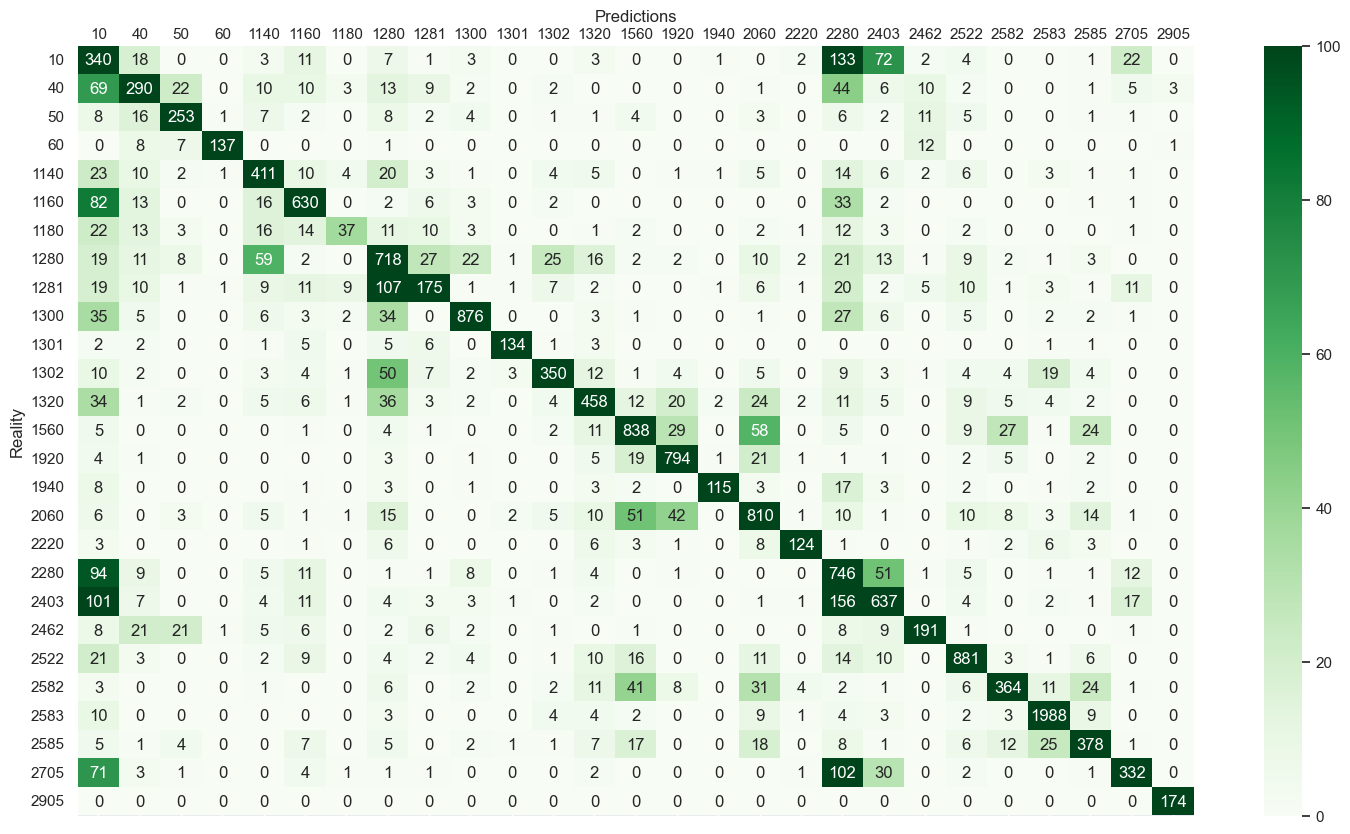

In [161]:
print(cm.shape)

fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(cm, annot = True, ax=ax, cmap='Greens', fmt ='d', vmin = 0, vmax = 100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_tick_params(length = 0)
ax.xaxis.set_label_position('top')

**Save confusion matrix**

In [165]:
export = False

if export:
    filename = base_text_path + model_date_time + '_txt_svc' + '_confusionMatrix.csv'
    
    cm.to_csv(filename, header = True, index = True)
    print(filename)

../Base_models/Text/2308181336_txt_svc_confusionMatrix.csv


**Classification Report: macro & micro**

In [170]:
from sklearn.metrics import classification_report 

cr = classification_report(y_test, y_pred, output_dict = True)
cr.update({"accuracy": {"precision": None, "recall": None, "f1-score": cr["accuracy"], "support": cr['macro avg']['support']}})

micro_svc = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'prdtypecode'}).iloc[:-3,:]
macro_svc = pd.DataFrame(cr).transpose().reset_index().rename(columns={'index': 'metrics'}).iloc[-3:,:]

# display(micro_dt)
# display(macro_dt)

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       0.34      0.55      0.42       623
          40       0.65      0.58      0.61       502
          50       0.77      0.75      0.76       336
          60       0.97      0.83      0.89       166
        1140       0.72      0.77      0.75       534
        1160       0.83      0.80      0.81       791
        1180       0.63      0.24      0.35       153
        1280       0.67      0.74      0.70       974
        1281       0.67      0.42      0.52       414
        1300       0.93      0.87      0.90      1009
        1301       0.94      0.83      0.88       161
        1302       0.85      0.70      0.77       498
        1320       0.79      0.71      0.75       648
        1560       0.83      0.83      0.83      1015
        1920       0.88      0.92      0.90       861
        1940       0.95      0.71      0.82       161
        2060       0.79      0.81      0.80       999
        2220       0.88    

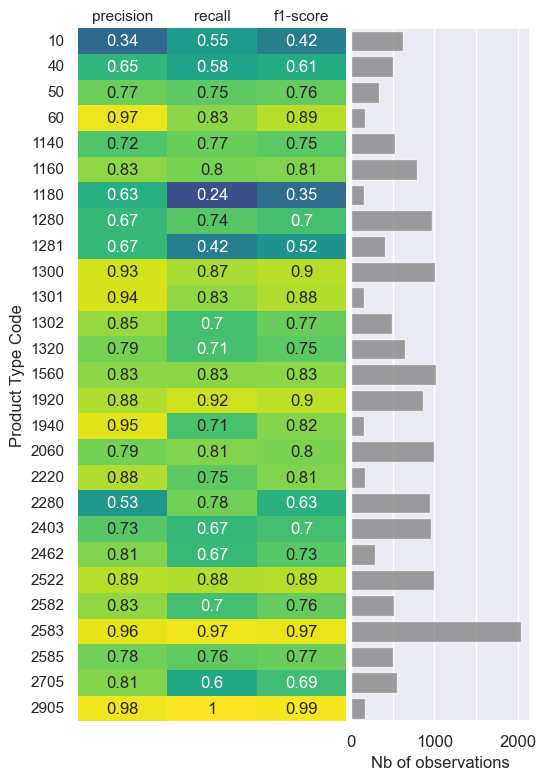

In [172]:
import FusionModel_tools as fm

fm.plot_classificationReport(micro_svc)

**Top Classified Categories**

In [180]:
micro_svc.sort_values(by = 'f1-score', ascending=False).head(5)

,prdtypecode,precision,recall,f1-score,support
26,2905,0.977528,1.000000,0.988636,174.0
23,2583,0.959459,0.973555,0.966456,2042.0
14,1920,0.880266,0.922184,0.900737,861.0
9,1300,0.929936,0.868186,0.898001,1009.0
3,60,0.971631,0.825301,0.892508,166.0


**Worst Classified Categories**

In [181]:
micro_svc.sort_values(by = 'f1-score', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.627119,0.241830,0.349057,153.0
0,10,0.339321,0.545746,0.418462,623.0
8,1281,0.665399,0.422705,0.516987,414.0
1,40,0.653153,0.577689,0.613108,502.0
18,2280,0.531339,0.783613,0.633277,952.0


**Less represented categories scores**

In [182]:
micro_svc.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.627119,0.241830,0.349057,153.0
10,1301,0.937063,0.832298,0.881579,161.0
15,1940,0.950413,0.714286,0.815603,161.0
17,2220,0.879433,0.751515,0.810458,165.0
3,60,0.971631,0.825301,0.892508,166.0


**Save Classification Report**

In [177]:
export = True

if export:
    filename = base_text_path + model_date_time +'_txt_svc' + '_classificationReport.txt'
    
    with open(filename, 'w') as file:
        file.write(classification_report(y_test, y_pred))
        print(filename)

../Base_models/Text/2308181336_txt_svc_classificationReport.txt


**Save trained model ready to use**

In [178]:
save = True
reload = False

saved_model = base_text_path + model_date_time + '_txt_svc_trained' + '.joblib'

from joblib import dump, load

if save:
    dump(svc_clf, saved_model) #
    print("Saved trained model:", saved_model)
    
if reload:
    svc_clf=load(saved_model)
    print("reloaded model: ", saved_model)

Saved trained model: ../Base_models/Text/2308181336_txt_svc_trained.joblib


In [179]:
svc_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
### The following code snipet is computationally very costly. Run during night.

from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt00
%matplotlib inline

perm_importance = permutation_importance(svc_clf, X_test.toarray(), y_test)

# feature_names = ['feature1', 'feature2', 'feature3', ...... ]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Simple Neural Network

In [10]:
XX_train = text_data['X_train']
XX_test = text_data['X_test']

yy_train = targets['y_train']
yy_test = targets['y_test']

**Define model : NN layers**

In [11]:
XX_train.shape

(67932, 5035)

In [48]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout 

## data dimensions
Nb_features = XX_train.shape[1]
Nb_classes = yy_train.shape[1]


## instantiate layers

inputs = Input(shape = Nb_features, name = "input")

dense1 = Dense(units = 256, activation = "relu", \
               kernel_initializer ='normal', name = "dense_1")

drop = Dropout(rate = 0.7, seed = myseed)

dense2 = Dense(units = Nb_classes, activation = "softmax", \
               kernel_initializer ='normal', name = "dense_2")


## link layers & model

x = dense1(inputs)
x = drop(x)
outputs = dense2(x)

NN_clf = Model(inputs = inputs, outputs = outputs)

In [49]:
## to visualize a schema of the model

NN_clf.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5035)]            0         
                                                                 
 dense_1 (Dense)             (None, 256)               1289216   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 27)                6939      
                                                                 
Total params: 1,296,155
Trainable params: 1,296,155
Non-trainable params: 0
_________________________________________________________________


**Compile model**

In [50]:
Nb_epochs = 60    # Nb of epoch for training
lr_0 = 0.4e-3     # Initial learning rate

NN_clf = tbm.compile_fusion_model(NN_clf, lr_0)

**Define callback to use**

In [51]:
checkpoint_filepath = './tmp_checkpoint/text_base_model/'
# callbacks = tbm.get_callbacks(checkpoint_filepath)


# scheduler, schedule = tbm.LR_scheduler()
# tbm.plot_lr_schedule(schedule, names = ['step_decay'], lr0 = lr_0, epochs = Nb_epochs)


callbacks = [
            tbm.get_model_checkpoint(checkpoint_filepath),
            tbm.get_reduceLRonPlateau()
            ]

**Train Model**

In [52]:
t0 = time.time()

training_history = NN_clf.fit(XX_train.toarray(), yy_train,          
                             epochs = Nb_epochs,               
                             batch_size = 200,          
                             validation_split = 0.2,
                             callbacks = callbacks)

NN_clf.load_weights(checkpoint_filepath)

t1 = time.time()
print("For %d observations, training time = %0.2f seconds" %(XX_train.shape[0], (t1-t0) ) )

model_date_time = tbm.date_time()
print(model_date_time)

Epoch 1/60
270/272 [============================>.] - ETA: 0s - loss: 2.7855 - accuracy: 0.2546
Epoch 1: val_accuracy improved from -inf to 0.47671, saving model to ./tmp_checkpoint/text_base_model\
272/272 [==============================] - 4s 14ms/step - loss: 2.7823 - accuracy: 0.2556 - val_loss: 2.1866 - val_accuracy: 0.4767 - lr: 4.0000e-04
Epoch 2/60
271/272 [============================>.] - ETA: 0s - loss: 1.8714 - accuracy: 0.5237
Epoch 2: val_accuracy improved from 0.47671 to 0.64238, saving model to ./tmp_checkpoint/text_base_model\
272/272 [==============================] - 3s 12ms/step - loss: 1.8707 - accuracy: 0.5238 - val_loss: 1.5077 - val_accuracy: 0.6424 - lr: 4.0000e-04
Epoch 3/60
270/272 [============================>.] - ETA: 0s - loss: 1.4200 - accuracy: 0.6310
Epoch 3: val_accuracy improved from 0.64238 to 0.69699, saving model to ./tmp_checkpoint/text_base_model\
272/272 [==============================] - 3s 12ms/step - loss: 1.4199 - accuracy: 0.6309 - val_los

272/272 [==============================] - 3s 12ms/step - loss: 0.5208 - accuracy: 0.8439 - val_loss: 0.7126 - val_accuracy: 0.7810 - lr: 4.0000e-04
Epoch 25/60
268/272 [============================>.] - ETA: 0s - loss: 0.5094 - accuracy: 0.8479
Epoch 25: val_accuracy did not improve from 0.78097
272/272 [==============================] - 3s 12ms/step - loss: 0.5088 - accuracy: 0.8482 - val_loss: 0.7141 - val_accuracy: 0.7805 - lr: 4.0000e-04
Epoch 26/60
272/272 [==============================] - ETA: 0s - loss: 0.4961 - accuracy: 0.8504
Epoch 26: val_accuracy improved from 0.78097 to 0.78119, saving model to ./tmp_checkpoint/text_base_model\
272/272 [==============================] - 3s 12ms/step - loss: 0.4961 - accuracy: 0.8504 - val_loss: 0.7140 - val_accuracy: 0.7812 - lr: 4.0000e-04
Epoch 27/60
268/272 [============================>.] - ETA: 0s - loss: 0.4883 - accuracy: 0.8526
Epoch 27: val_accuracy did not improve from 0.78119
272/272 [==============================] - 3s 12ms/

**Score Evolution during training**

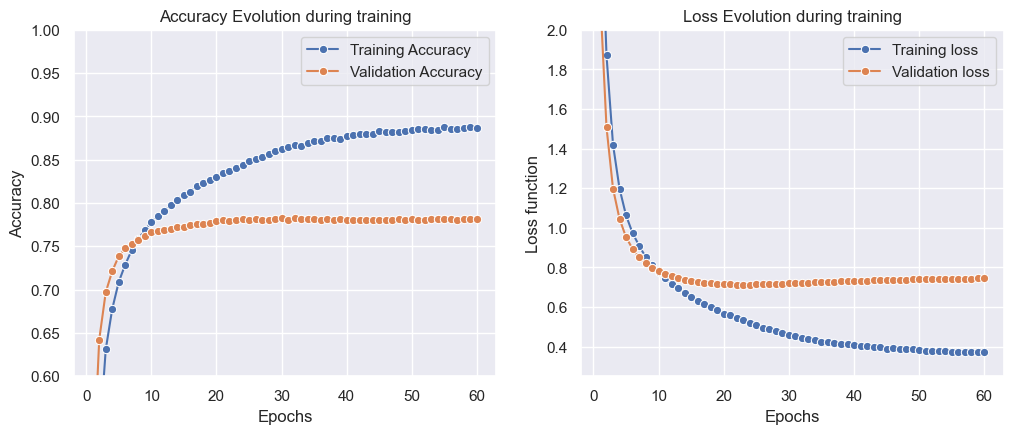

In [58]:
tbm.plot_training_history(training_history, Nb_epochs,AccRange = [0.6,1], LossRange = [0.25,2])

**Train-Test accuracy**

In [68]:
loss_train, NN_accuracy_train = NN_clf.evaluate(XX_train.toarray(), yy_train)
loss_test, NN_accuracy_test = NN_clf.evaluate(XX_test.toarray(), yy_test)

# svc_accuracy_train = grid_svc.score(X_train, y_train)
# svc_accuracy_test = grid_svc.score(X_test, y_test)

print("Train set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_train, loss_train) )
print("Test  set accuracy = %0.3f and loss function = %0.2f" %(NN_accuracy_test, loss_test))

531/531 [==============================] - 1s 3ms/step - loss: 0.7550 - accuracy: 0.7718
Train set accuracy = 0.871 and loss function = 0.43
Test  set accuracy = 0.772 and loss function = 0.76


**Predictions**

In [71]:
t0 = time.time()
yy_pred_vectors = NN_clf.predict(XX_test.toarray())
t1 = time.time()
print("Predictions made on %0.2f seconds" %(t1-t0))

# ## reverse One-hot-encoding
# y_pred_class = yy_pred_vectors.argmax(axis = 1)
# y_test_class = yy_test.argmax(axis = 1)

# ## reverse label encoder
# y_pred = target_encoder.inverse_transform(y_pred_class)
# y_test = target_encoder.inverse_transform(y_test_class)   # should be equal to y_test



531/531 [==============================] - 1s 2ms/step
Predictions made on 2.11 seconds


**Confussion Matrix**

In [72]:
cm = tbm.get_confusionMatrix(yy_test, yy_pred_vectors, 
                       target_encoder, product_class['prdtypecode'])

(27, 27)


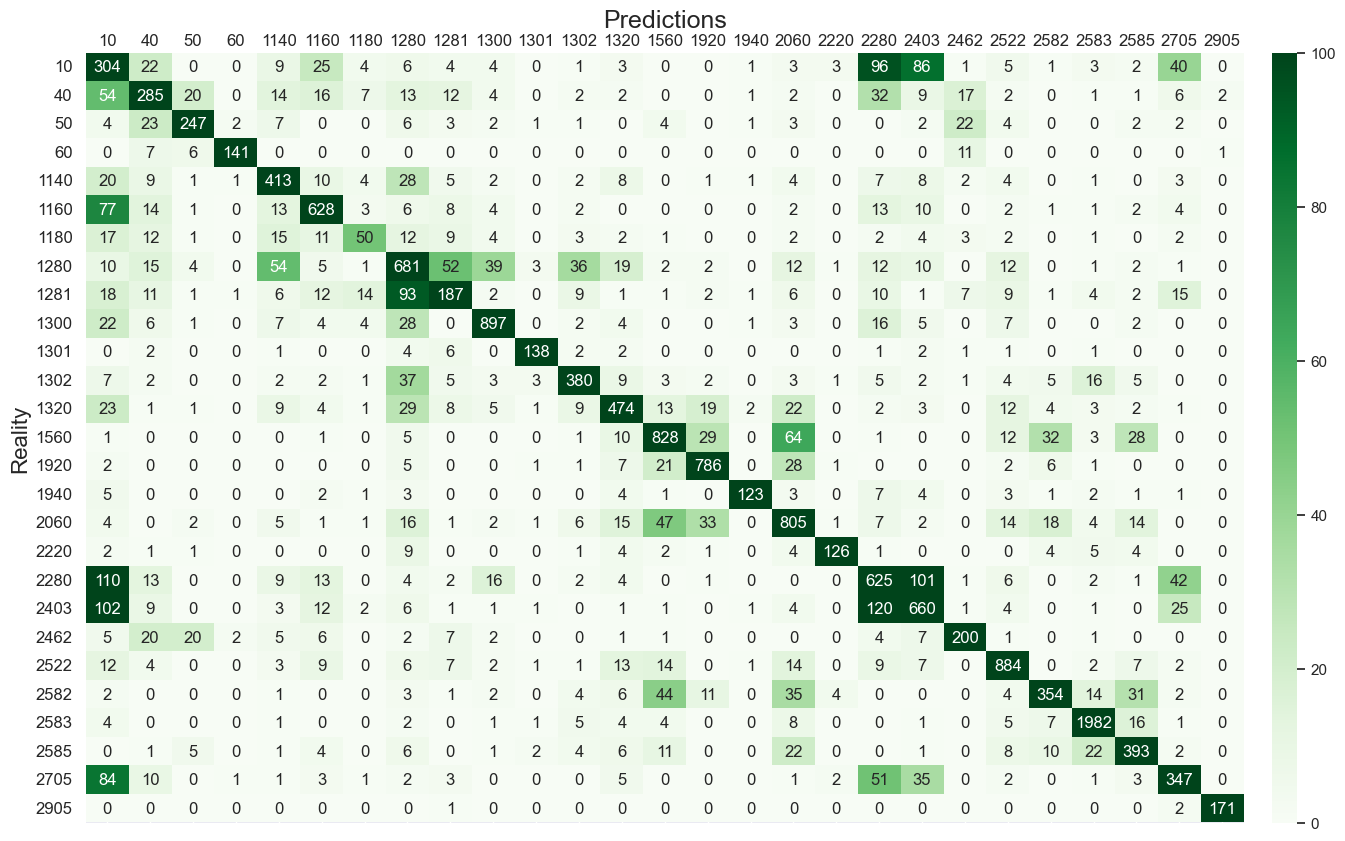

In [73]:
tbm.plot_confusionMatrix(cm)

**Save confusion matrix**

In [74]:
export = True

if export:
    filename = base_text_path + model_date_time + '_txt_NN' + '_confusionMatrix.csv'
    
    cm.to_csv(filename, header = True, index = True)
    print(filename)

../Base_models/Text/2309011531_txt_NN_confusionMatrix.csv


**Classification Report: macro & micro**

In [75]:
cr, micro_cr, macro_cr = tbm.get_classificationReport(yy_test, yy_pred_vectors,
                                                     target_encoder, product_class['prdtypecode'])

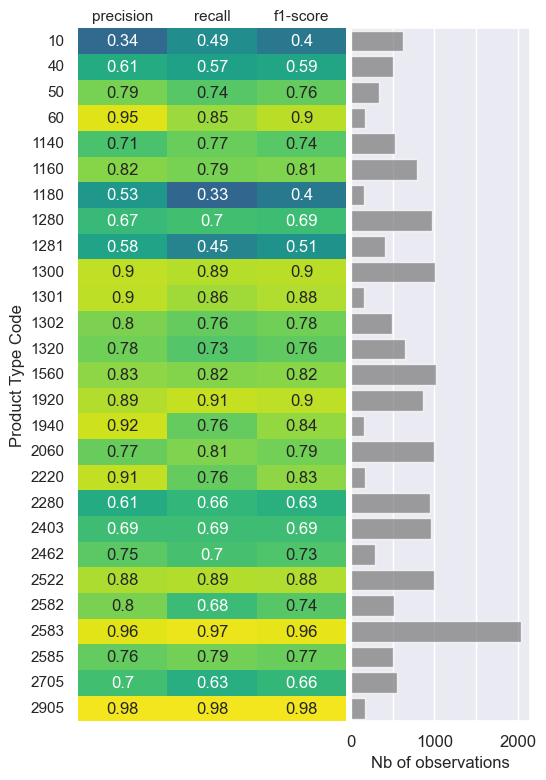

In [76]:
tbm.plot_classificationReport(micro_cr)

**Top Classified Categories**

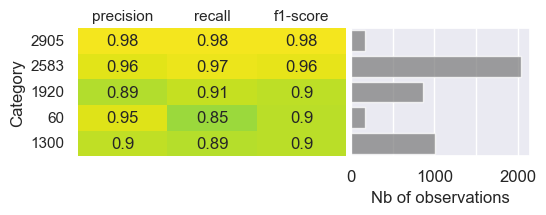

In [87]:
micro_best = micro_cr.sort_values(by = 'f1-score', ascending=False).head(5)
tbm.plot_classificationReport_extract(micro_best, nb_classes = 27, nb_2show = len(micro_best))

**Worst Classified Categories**

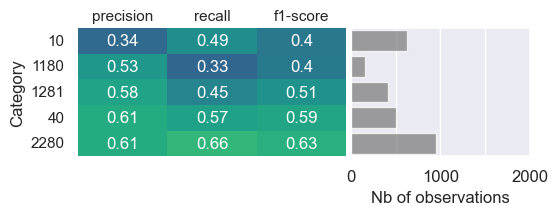

In [89]:
micro_worst = micro_cr.sort_values(by = 'f1-score', ascending=True).head(5)
tbm.plot_classificationReport_extract(micro_worst, nb_classes = 27, nb_2show = len(micro_best))

**Less represented categories scores**

In [90]:
micro_cr.sort_values(by = 'support', ascending=True).head(5)

,prdtypecode,precision,recall,f1-score,support
6,1180,0.531915,0.326797,0.404858,153.0
10,1301,0.901961,0.857143,0.878981,161.0
15,1940,0.924812,0.763975,0.836735,161.0
17,2220,0.906475,0.763636,0.828947,165.0
3,60,0.952703,0.849398,0.898089,166.0


**Save Classification Report**

In [93]:
export = False
path = '../Base_models/Text/'
if export:
    tbm.save_model_metrics(cr, metric_type = 'classificationReport_txt', 
                                   model_name = 'txt_NN', 
                                   path = path , 
                                   timestamp = model_date_time )

    tbm.save_model_metrics(micro_cr, metric_type = 'classificationReport_df', 
                                   model_name = 'txt_NN', 
                                   path = path , 
                                   timestamp = model_date_time )

    tbm.save_model_metrics(macro_cr, metric_type = 'classificationReport_df', 
                                   model_name = 'txt_NN', 
                                   path = path , 
                                   timestamp = model_date_time )

../Base_models/Text/2309011531_txt_NN_classificationReport.txt
../Base_models/Text/2309011531_txt_NN_classificationReport.csv
../Base_models/Text/2309011531_txt_NN_classificationReport.csv


**Save trained model ready to use**

In [94]:
save = True
reload = False


if save:
    model_filename = base_text_path + model_date_time +'_txt_NN_trained' + '.keras'
    
    NN_clf.save(model_filename)
    print("Trained model saved:", model_filename)
    

if reload:
    saved_model = base_text_path + '2308191608_img_CCNN_trained.keras'
    
    from tensorflow.keras.models import load_model
    CNN_clf_reload = load_model(saved_model)
    print("Trained model reloaded: ", saved_model)

Trained model saved: ../Base_models/Text/2309011531_txt_NN_trained.keras


### Optimize hyper parameters

In [108]:
#XX_test.toarray(), yy_test)

Nb_epochs = 50  # Nb of epoch for training
# lr_0 = 2e-6     # intial learning rate

Nb_features = XX_train.shape[1]
Nb_classes = yy_train.shape[1]

dense0_units = [16,32,64,128,256,512,1024]
# dense1_units = [1024]
# dense2_units = [512]  # 30 in total
drop_range = [0.4, 0.7]           # x2 = 20 in total @ 20 min each (60 epochs) 3/hour --> 7 hs for the 30

param_trained = []
train_histories = []
acc_train = []
acc_test = []
losses_train = []
losses_test = []

# for u1 in dense1_units:
#     for u2 in dense2_units:
#         if u2 <= u1:
for drop0 in drop_range:
    for u1 in dense0_units:
        if True:
            if True:
                
                param_trained.append( (u1, drop0) )
                print("Model parameters :", u1, drop0)
                
                name = 'params_' + str(u1) + '_' + str(drop0)

                checkpoint_path = tbm.create_checkpoint_folders(foldername = name, 
                                                            checkpoints_path = './tmp_checkpoint/text_base_model/optimization/')
                
                inputs = Input(shape = Nb_features, name = "input")
                dense1 = Dense(units = u1, activation = "relu", \
                               kernel_initializer ='normal', name = "dense_1")
                drop = Dropout(rate = drop0, seed = myseed)
                dense2 = Dense(units = Nb_classes, activation = "softmax", \
                               kernel_initializer ='normal', name = "dense_2")
                x = dense1(inputs)
                x = drop(x)
                outputs = dense2(x)
                model = Model(inputs = inputs, outputs = outputs)                
                model.summary()

#                 model = fm.compile_fusion_model(fusion_model, lr_0)
                model = tbm.compile_fusion_model(model, lr_0)
                
                training_history = model.fit(XX_train.toarray(), yy_train,
                                               epochs = Nb_epochs,
                                               batch_size = 200,
                                               validation_split = 0.2,
                                               callbacks = [
                                                            tbm.get_model_checkpoint(checkpoint_path),
                                                            tbm.get_reduceLRonPlateau()
                                                            ])

                model.load_weights(checkpoint_path)

                train_histories.append(training_history)

                ## train test accuracy
                loss_train, accuracy_train = model.evaluate(XX_train.toarray(), yy_train)         
                loss_test, accuracy_test = model.evaluate(XX_test.toarray(), yy_test)
         
                losses_train.append(loss_train)
                losses_test.append(loss_test)

                acc_train.append(accuracy_train)
                acc_test.append(accuracy_test)

results = {'param_trained' : param_trained,
           'train_histories' : train_histories,
           'accuracy_train' : acc_train,
           'accuracy_test' : acc_test,
           'loss_train' : losses_train,
           'loss_test' : losses_test}

Model parameters : 16 0.4
 exists!
Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5035)]            0         
                                                                 
 dense_1 (Dense)             (None, 16)                80576     
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 27)                459       
                                                                 
Total params: 81,035
Trainable params: 81,035
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
266/272 [============================>.] - ETA: 0s - loss: 3.1535 - accuracy: 0.1193
Epoch 1: val_accuracy improved from -inf to 0.11945, sa

Epoch 42/50
269/272 [============================>.] - ETA: 0s - loss: 1.1150 - accuracy: 0.6564
Epoch 42: val_accuracy improved from 0.74321 to 0.74358, saving model to ./tmp_checkpoint/text_base_model/optimization/params_16_0.4\
272/272 [==============================] - 1s 5ms/step - loss: 1.1144 - accuracy: 0.6567 - val_loss: 0.9115 - val_accuracy: 0.7436 - lr: 4.0000e-04
Epoch 43/50
262/272 [===========================>..] - ETA: 0s - loss: 1.1012 - accuracy: 0.6590
Epoch 43: val_accuracy improved from 0.74358 to 0.74409, saving model to ./tmp_checkpoint/text_base_model/optimization/params_16_0.4\
272/272 [==============================] - 1s 5ms/step - loss: 1.1006 - accuracy: 0.6596 - val_loss: 0.9084 - val_accuracy: 0.7441 - lr: 4.0000e-04
Epoch 44/50
262/272 [===========================>..] - ETA: 0s - loss: 1.0980 - accuracy: 0.6616
Epoch 44: val_accuracy did not improve from 0.74409
272/272 [==============================] - 1s 4ms/step - loss: 1.0961 - accuracy: 0.6620 - va

272/272 [==============================] - 1s 5ms/step - loss: 1.1811 - accuracy: 0.6725 - val_loss: 1.0316 - val_accuracy: 0.7190 - lr: 4.0000e-04
Epoch 12/50
267/272 [============================>.] - ETA: 0s - loss: 1.1423 - accuracy: 0.6827
Epoch 12: val_accuracy improved from 0.71900 to 0.72636, saving model to ./tmp_checkpoint/text_base_model/optimization/params_32_0.4\
272/272 [==============================] - 1s 5ms/step - loss: 1.1414 - accuracy: 0.6830 - val_loss: 0.9962 - val_accuracy: 0.7264 - lr: 4.0000e-04
Epoch 13/50
272/272 [==============================] - ETA: 0s - loss: 1.1063 - accuracy: 0.6896
Epoch 13: val_accuracy improved from 0.72636 to 0.73195, saving model to ./tmp_checkpoint/text_base_model/optimization/params_32_0.4\
272/272 [==============================] - 1s 5ms/step - loss: 1.1063 - accuracy: 0.6896 - val_loss: 0.9681 - val_accuracy: 0.7319 - lr: 4.0000e-04
Epoch 14/50
263/272 [============================>.] - ETA: 0s - loss: 1.0752 - accuracy: 0.70

272/272 [==============================] - 2s 6ms/step - loss: 0.7813 - accuracy: 0.7741 - val_loss: 0.7804 - val_accuracy: 0.7640 - lr: 4.0000e-04
Epoch 34/50
268/272 [============================>.] - ETA: 0s - loss: 0.7669 - accuracy: 0.7777
Epoch 34: val_accuracy improved from 0.76404 to 0.76455, saving model to ./tmp_checkpoint/text_base_model/optimization/params_32_0.4\
272/272 [==============================] - 1s 5ms/step - loss: 0.7677 - accuracy: 0.7775 - val_loss: 0.7776 - val_accuracy: 0.7646 - lr: 4.0000e-04
Epoch 35/50
270/272 [============================>.] - ETA: 0s - loss: 0.7619 - accuracy: 0.7776
Epoch 35: val_accuracy improved from 0.76455 to 0.76500, saving model to ./tmp_checkpoint/text_base_model/optimization/params_32_0.4\
272/272 [==============================] - 1s 5ms/step - loss: 0.7618 - accuracy: 0.7776 - val_loss: 0.7759 - val_accuracy: 0.7650 - lr: 4.0000e-04
Epoch 36/50
263/272 [============================>.] - ETA: 0s - loss: 0.7506 - accuracy: 0.78

Epoch 4/50
269/272 [============================>.] - ETA: 0s - loss: 1.4994 - accuracy: 0.6089
Epoch 4: val_accuracy improved from 0.61897 to 0.66924, saving model to ./tmp_checkpoint/text_base_model/optimization/params_64_0.4\
272/272 [==============================] - 2s 7ms/step - loss: 1.4978 - accuracy: 0.6092 - val_loss: 1.3161 - val_accuracy: 0.6692 - lr: 4.0000e-04
Epoch 5/50
270/272 [============================>.] - ETA: 0s - loss: 1.3145 - accuracy: 0.6512
Epoch 5: val_accuracy improved from 0.66924 to 0.69589, saving model to ./tmp_checkpoint/text_base_model/optimization/params_64_0.4\
272/272 [==============================] - 2s 7ms/step - loss: 1.3134 - accuracy: 0.6514 - val_loss: 1.1689 - val_accuracy: 0.6959 - lr: 4.0000e-04
Epoch 6/50
270/272 [============================>.] - ETA: 0s - loss: 1.1890 - accuracy: 0.6787
Epoch 6: val_accuracy improved from 0.69589 to 0.71164, saving model to ./tmp_checkpoint/text_base_model/optimization/params_64_0.4\
272/272 [========

Epoch 26/50
267/272 [============================>.] - ETA: 0s - loss: 0.6093 - accuracy: 0.8211
Epoch 26: val_accuracy did not improve from 0.77420
272/272 [==============================] - 2s 7ms/step - loss: 0.6097 - accuracy: 0.8208 - val_loss: 0.7358 - val_accuracy: 0.7735 - lr: 4.0000e-04
Epoch 27/50
264/272 [============================>.] - ETA: 0s - loss: 0.5935 - accuracy: 0.8245
Epoch 27: val_accuracy improved from 0.77420 to 0.77442, saving model to ./tmp_checkpoint/text_base_model/optimization/params_64_0.4\
272/272 [==============================] - 2s 7ms/step - loss: 0.5939 - accuracy: 0.8244 - val_loss: 0.7341 - val_accuracy: 0.7744 - lr: 4.0000e-04
Epoch 28/50
264/272 [============================>.] - ETA: 0s - loss: 0.5860 - accuracy: 0.8250
Epoch 28: val_accuracy did not improve from 0.77442
272/272 [==============================] - 2s 7ms/step - loss: 0.5847 - accuracy: 0.8255 - val_loss: 0.7331 - val_accuracy: 0.7741 - lr: 4.0000e-04
Epoch 29/50
264/272 [======

272/272 [==============================] - 2s 7ms/step - loss: 0.4578 - accuracy: 0.8625 - val_loss: 0.7436 - val_accuracy: 0.7794 - lr: 1.3720e-04
Epoch 50/50
267/272 [============================>.] - ETA: 0s - loss: 0.4578 - accuracy: 0.8636
Epoch 50: val_accuracy did not improve from 0.77957
531/531 [==============================] - 2s 4ms/step - loss: 0.7782 - accuracy: 0.7676
Model parameters : 128 0.4
 exists!
Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5035)]            0         
                                                                 
 dense_1 (Dense)             (None, 128)               644608    
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_2 (Dense)             (No

272/272 [==============================] - 2s 9ms/step - loss: 0.5538 - accuracy: 0.8346 - val_loss: 0.7242 - val_accuracy: 0.7768 - lr: 4.0000e-04
Epoch 19/50
265/272 [============================>.] - ETA: 0s - loss: 0.5398 - accuracy: 0.8370
Epoch 19: val_accuracy did not improve from 0.77685
272/272 [==============================] - 2s 9ms/step - loss: 0.5397 - accuracy: 0.8368 - val_loss: 0.7214 - val_accuracy: 0.7767 - lr: 4.0000e-04
Epoch 20/50
266/272 [============================>.] - ETA: 0s - loss: 0.5252 - accuracy: 0.8405
Epoch 20: val_accuracy improved from 0.77685 to 0.77736, saving model to ./tmp_checkpoint/text_base_model/optimization/params_128_0.4\
272/272 [==============================] - 2s 9ms/step - loss: 0.5248 - accuracy: 0.8405 - val_loss: 0.7205 - val_accuracy: 0.7774 - lr: 4.0000e-04
Epoch 21/50
265/272 [============================>.] - ETA: 0s - loss: 0.5100 - accuracy: 0.8467
Epoch 21: val_accuracy improved from 0.77736 to 0.77854, saving model to ./tmp

Epoch 44/50
271/272 [============================>.] - ETA: 0s - loss: 0.3719 - accuracy: 0.8876
Epoch 44: val_accuracy did not improve from 0.77950
272/272 [==============================] - 2s 9ms/step - loss: 0.3717 - accuracy: 0.8877 - val_loss: 0.7485 - val_accuracy: 0.7780 - lr: 9.6040e-05
Epoch 45/50
266/272 [============================>.] - ETA: 0s - loss: 0.3720 - accuracy: 0.8867
Epoch 45: val_accuracy did not improve from 0.77950
272/272 [==============================] - 2s 8ms/step - loss: 0.3709 - accuracy: 0.8871 - val_loss: 0.7494 - val_accuracy: 0.7777 - lr: 9.6040e-05
Epoch 46/50
268/272 [============================>.] - ETA: 0s - loss: 0.3677 - accuracy: 0.8879
Epoch 46: val_accuracy did not improve from 0.77950

Epoch 46: ReduceLROnPlateau reducing learning rate to 6.722798934788443e-05.
272/272 [==============================] - 2s 8ms/step - loss: 0.3685 - accuracy: 0.8877 - val_loss: 0.7503 - val_accuracy: 0.7778 - lr: 9.6040e-05
Epoch 47/50
270/272 [==========

Epoch 40/50
271/272 [============================>.] - ETA: 0s - loss: 0.3069 - accuracy: 0.9072
Epoch 40: val_accuracy did not improve from 0.78104

Epoch 40: ReduceLROnPlateau reducing learning rate to 6.722798934788443e-05.
272/272 [==============================] - 3s 12ms/step - loss: 0.3068 - accuracy: 0.9072 - val_loss: 0.7813 - val_accuracy: 0.7769 - lr: 9.6040e-05
Epoch 41/50
271/272 [============================>.] - ETA: 0s - loss: 0.3053 - accuracy: 0.9068
Epoch 41: val_accuracy did not improve from 0.78104
272/272 [==============================] - 3s 12ms/step - loss: 0.3052 - accuracy: 0.9068 - val_loss: 0.7824 - val_accuracy: 0.7775 - lr: 6.7228e-05
Epoch 42/50
271/272 [============================>.] - ETA: 0s - loss: 0.3023 - accuracy: 0.9091
Epoch 42: val_accuracy did not improve from 0.78104
272/272 [==============================] - 3s 12ms/step - loss: 0.3023 - accuracy: 0.9092 - val_loss: 0.7839 - val_accuracy: 0.7774 - lr: 6.7228e-05
Epoch 43/50
271/272 [=======

272/272 [==============================] - 6s 22ms/step - loss: 0.4980 - accuracy: 0.8496 - val_loss: 0.7190 - val_accuracy: 0.7798 - lr: 4.0000e-04
Epoch 11/50
271/272 [============================>.] - ETA: 0s - loss: 0.4747 - accuracy: 0.8564
Epoch 11: val_accuracy did not improve from 0.77979
272/272 [==============================] - 6s 21ms/step - loss: 0.4744 - accuracy: 0.8565 - val_loss: 0.7194 - val_accuracy: 0.7797 - lr: 4.0000e-04
Epoch 12/50
271/272 [============================>.] - ETA: 0s - loss: 0.4504 - accuracy: 0.8639
Epoch 12: val_accuracy did not improve from 0.77979
272/272 [==============================] - 6s 21ms/step - loss: 0.4502 - accuracy: 0.8640 - val_loss: 0.7223 - val_accuracy: 0.7796 - lr: 4.0000e-04
Epoch 13/50
271/272 [============================>.] - ETA: 0s - loss: 0.4304 - accuracy: 0.8700
Epoch 13: val_accuracy did not improve from 0.77979
272/272 [==============================] - 6s 21ms/step - loss: 0.4304 - accuracy: 0.8699 - val_loss: 0.72

Epoch 37/50
271/272 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.9195
Epoch 37: val_accuracy did not improve from 0.77979
272/272 [==============================] - 6s 21ms/step - loss: 0.2647 - accuracy: 0.9196 - val_loss: 0.8189 - val_accuracy: 0.7748 - lr: 6.7228e-05
Epoch 38/50
271/272 [============================>.] - ETA: 0s - loss: 0.2631 - accuracy: 0.9201
Epoch 38: val_accuracy did not improve from 0.77979
272/272 [==============================] - 6s 21ms/step - loss: 0.2631 - accuracy: 0.9201 - val_loss: 0.8210 - val_accuracy: 0.7747 - lr: 6.7228e-05
Epoch 39/50
271/272 [============================>.] - ETA: 0s - loss: 0.2618 - accuracy: 0.9205
Epoch 39: val_accuracy did not improve from 0.77979
272/272 [==============================] - 6s 21ms/step - loss: 0.2619 - accuracy: 0.9205 - val_loss: 0.8227 - val_accuracy: 0.7747 - lr: 6.7228e-05
Epoch 40/50
271/272 [============================>.] - ETA: 0s - loss: 0.2618 - accuracy: 0.9203
Epoch 40:

272/272 [==============================] - ETA: 0s - loss: 0.2265 - accuracy: 0.9313
Epoch 34: val_accuracy did not improve from 0.77950
272/272 [==============================] - 11s 42ms/step - loss: 0.2265 - accuracy: 0.9313 - val_loss: 0.8713 - val_accuracy: 0.7689 - lr: 6.7228e-05
Epoch 35/50
271/272 [============================>.] - ETA: 0s - loss: 0.2235 - accuracy: 0.9326
Epoch 35: val_accuracy did not improve from 0.77950
272/272 [==============================] - 11s 42ms/step - loss: 0.2235 - accuracy: 0.9326 - val_loss: 0.8734 - val_accuracy: 0.7699 - lr: 6.7228e-05
Epoch 36/50
271/272 [============================>.] - ETA: 0s - loss: 0.2226 - accuracy: 0.9331
Epoch 36: val_accuracy did not improve from 0.77950
272/272 [==============================] - 11s 42ms/step - loss: 0.2226 - accuracy: 0.9331 - val_loss: 0.8760 - val_accuracy: 0.7693 - lr: 6.7228e-05
Epoch 37/50
271/272 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9339
Epoch 37: val_accu

272/272 [==============================] - 1s 5ms/step - loss: 2.5226 - accuracy: 0.2255 - val_loss: 2.2811 - val_accuracy: 0.4350 - lr: 4.0000e-04
Epoch 6/50
263/272 [============================>.] - ETA: 0s - loss: 2.4374 - accuracy: 0.2491
Epoch 6: val_accuracy improved from 0.43497 to 0.45735, saving model to ./tmp_checkpoint/text_base_model/optimization/params_16_0.7\
272/272 [==============================] - 1s 5ms/step - loss: 2.4365 - accuracy: 0.2496 - val_loss: 2.1660 - val_accuracy: 0.4573 - lr: 4.0000e-04
Epoch 7/50
267/272 [============================>.] - ETA: 0s - loss: 2.3770 - accuracy: 0.2657
Epoch 7: val_accuracy improved from 0.45735 to 0.46699, saving model to ./tmp_checkpoint/text_base_model/optimization/params_16_0.7\
272/272 [==============================] - 1s 5ms/step - loss: 2.3759 - accuracy: 0.2660 - val_loss: 2.0755 - val_accuracy: 0.4670 - lr: 4.0000e-04
Epoch 8/50
267/272 [============================>.] - ETA: 0s - loss: 2.3156 - accuracy: 0.2797
Ep

265/272 [============================>.] - ETA: 0s - loss: 1.8422 - accuracy: 0.3914
Epoch 49: val_accuracy did not improve from 0.64827
272/272 [==============================] - 1s 5ms/step - loss: 1.8400 - accuracy: 0.3918 - val_loss: 1.2802 - val_accuracy: 0.6483 - lr: 4.0000e-04
Epoch 50/50
264/272 [============================>.] - ETA: 0s - loss: 1.8338 - accuracy: 0.3936
Epoch 50: val_accuracy did not improve from 0.64827
531/531 [==============================] - 2s 3ms/step - loss: 1.3048 - accuracy: 0.6491
Model parameters : 32 0.7
 exists!
Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5035)]            0         
                                                                 
 dense_1 (Dense)             (None, 32)                161152    
                                                                 
 dropout_30 (Dropout)       

Epoch 40/50
265/272 [============================>.] - ETA: 0s - loss: 1.2940 - accuracy: 0.5895
Epoch 40: val_accuracy improved from 0.74247 to 0.74321, saving model to ./tmp_checkpoint/text_base_model/optimization/params_32_0.7\
272/272 [==============================] - 2s 6ms/step - loss: 1.2941 - accuracy: 0.5894 - val_loss: 0.9246 - val_accuracy: 0.7432 - lr: 4.0000e-04
Epoch 41/50
267/272 [============================>.] - ETA: 0s - loss: 1.2915 - accuracy: 0.5928
Epoch 41: val_accuracy improved from 0.74321 to 0.74586, saving model to ./tmp_checkpoint/text_base_model/optimization/params_32_0.7\
272/272 [==============================] - 1s 5ms/step - loss: 1.2916 - accuracy: 0.5926 - val_loss: 0.9213 - val_accuracy: 0.7459 - lr: 4.0000e-04
Epoch 42/50
268/272 [============================>.] - ETA: 0s - loss: 1.2795 - accuracy: 0.5944
Epoch 42: val_accuracy did not improve from 0.74586
272/272 [==============================] - 2s 6ms/step - loss: 1.2786 - accuracy: 0.5946 - va

Epoch 31/50
271/272 [============================>.] - ETA: 0s - loss: 0.8923 - accuracy: 0.7429
Epoch 31: val_accuracy improved from 0.76573 to 0.76765, saving model to ./tmp_checkpoint/text_base_model/optimization/params_64_0.7\
272/272 [==============================] - 2s 8ms/step - loss: 0.8925 - accuracy: 0.7428 - val_loss: 0.7813 - val_accuracy: 0.7676 - lr: 4.0000e-04
Epoch 32/50
270/272 [============================>.] - ETA: 0s - loss: 0.8808 - accuracy: 0.7472
Epoch 32: val_accuracy did not improve from 0.76765
272/272 [==============================] - 2s 7ms/step - loss: 0.8806 - accuracy: 0.7472 - val_loss: 0.7782 - val_accuracy: 0.7666 - lr: 4.0000e-04
Epoch 33/50
267/272 [============================>.] - ETA: 0s - loss: 0.8742 - accuracy: 0.7484
Epoch 33: val_accuracy improved from 0.76765 to 0.76853, saving model to ./tmp_checkpoint/text_base_model/optimization/params_64_0.7\
272/272 [==============================] - 2s 7ms/step - loss: 0.8736 - accuracy: 0.7487 - va

Epoch 23/50
267/272 [============================>.] - ETA: 0s - loss: 0.6991 - accuracy: 0.7984
Epoch 23: val_accuracy improved from 0.77074 to 0.77265, saving model to ./tmp_checkpoint/text_base_model/optimization/params_128_0.7\
272/272 [==============================] - 2s 8ms/step - loss: 0.6989 - accuracy: 0.7985 - val_loss: 0.7373 - val_accuracy: 0.7727 - lr: 4.0000e-04
Epoch 24/50
270/272 [============================>.] - ETA: 0s - loss: 0.6870 - accuracy: 0.8022
Epoch 24: val_accuracy improved from 0.77265 to 0.77353, saving model to ./tmp_checkpoint/text_base_model/optimization/params_128_0.7\
272/272 [==============================] - 2s 8ms/step - loss: 0.6874 - accuracy: 0.8021 - val_loss: 0.7347 - val_accuracy: 0.7735 - lr: 4.0000e-04
Epoch 25/50
266/272 [============================>.] - ETA: 0s - loss: 0.6760 - accuracy: 0.8056
Epoch 25: val_accuracy improved from 0.77353 to 0.77471, saving model to ./tmp_checkpoint/text_base_model/optimization/params_128_0.7\
272/272 

Epoch 47/50
270/272 [============================>.] - ETA: 0s - loss: 0.5142 - accuracy: 0.8472
Epoch 47: val_accuracy did not improve from 0.78192
272/272 [==============================] - 2s 8ms/step - loss: 0.5138 - accuracy: 0.8474 - val_loss: 0.7283 - val_accuracy: 0.7816 - lr: 1.9600e-04
Epoch 48/50
271/272 [============================>.] - ETA: 0s - loss: 0.5116 - accuracy: 0.8495
Epoch 48: val_accuracy did not improve from 0.78192
272/272 [==============================] - 2s 8ms/step - loss: 0.5114 - accuracy: 0.8495 - val_loss: 0.7289 - val_accuracy: 0.7817 - lr: 1.9600e-04
Epoch 49/50
265/272 [============================>.] - ETA: 0s - loss: 0.5100 - accuracy: 0.8498
Epoch 49: val_accuracy did not improve from 0.78192

Epoch 49: ReduceLROnPlateau reducing learning rate to 0.00013719998532906174.
272/272 [==============================] - 2s 8ms/step - loss: 0.5083 - accuracy: 0.8503 - val_loss: 0.7297 - val_accuracy: 0.7810 - lr: 1.9600e-04
Epoch 50/50
266/272 [=========

271/272 [============================>.] - ETA: 0s - loss: 0.4062 - accuracy: 0.8777
Epoch 40: val_accuracy did not improve from 0.78244
272/272 [==============================] - 3s 12ms/step - loss: 0.4061 - accuracy: 0.8778 - val_loss: 0.7311 - val_accuracy: 0.7817 - lr: 1.3720e-04
Epoch 41/50
270/272 [============================>.] - ETA: 0s - loss: 0.4048 - accuracy: 0.8766
Epoch 41: val_accuracy did not improve from 0.78244
272/272 [==============================] - 3s 13ms/step - loss: 0.4046 - accuracy: 0.8766 - val_loss: 0.7317 - val_accuracy: 0.7815 - lr: 1.3720e-04
Epoch 42/50
269/272 [============================>.] - ETA: 0s - loss: 0.4009 - accuracy: 0.8797
Epoch 42: val_accuracy did not improve from 0.78244
272/272 [==============================] - 3s 13ms/step - loss: 0.4005 - accuracy: 0.8799 - val_loss: 0.7329 - val_accuracy: 0.7813 - lr: 1.3720e-04
Epoch 43/50
271/272 [============================>.] - ETA: 0s - loss: 0.3993 - accuracy: 0.8792
Epoch 43: val_accurac

272/272 [==============================] - 5s 20ms/step - loss: 0.6369 - accuracy: 0.8119 - val_loss: 0.7342 - val_accuracy: 0.7725 - lr: 4.0000e-04
Epoch 11/50
271/272 [============================>.] - ETA: 0s - loss: 0.6097 - accuracy: 0.8176
Epoch 11: val_accuracy improved from 0.77250 to 0.77545, saving model to ./tmp_checkpoint/text_base_model/optimization/params_512_0.7\
272/272 [==============================] - 5s 20ms/step - loss: 0.6097 - accuracy: 0.8177 - val_loss: 0.7277 - val_accuracy: 0.7754 - lr: 4.0000e-04
Epoch 12/50
271/272 [============================>.] - ETA: 0s - loss: 0.5841 - accuracy: 0.8247
Epoch 12: val_accuracy improved from 0.77545 to 0.77655, saving model to ./tmp_checkpoint/text_base_model/optimization/params_512_0.7\
272/272 [==============================] - 5s 20ms/step - loss: 0.5840 - accuracy: 0.8248 - val_loss: 0.7209 - val_accuracy: 0.7766 - lr: 4.0000e-04
Epoch 13/50
272/272 [==============================] - ETA: 0s - loss: 0.5602 - accuracy:

272/272 [==============================] - 18s 66ms/step - loss: 0.5627 - accuracy: 0.8313 - val_loss: 0.7186 - val_accuracy: 0.7791 - lr: 4.0000e-04
Epoch 10/50
271/272 [============================>.] - ETA: 0s - loss: 0.5327 - accuracy: 0.8388
Epoch 10: val_accuracy improved from 0.77905 to 0.78089, saving model to ./tmp_checkpoint/text_base_model/optimization/params_1024_0.7\
272/272 [==============================] - 26s 96ms/step - loss: 0.5326 - accuracy: 0.8388 - val_loss: 0.7144 - val_accuracy: 0.7809 - lr: 4.0000e-04
Epoch 11/50
271/272 [============================>.] - ETA: 0s - loss: 0.5077 - accuracy: 0.8470
Epoch 11: val_accuracy did not improve from 0.78089
272/272 [==============================] - 19s 70ms/step - loss: 0.5074 - accuracy: 0.8471 - val_loss: 0.7132 - val_accuracy: 0.7796 - lr: 4.0000e-04
Epoch 12/50
271/272 [============================>.] - ETA: 0s - loss: 0.4835 - accuracy: 0.8541
Epoch 12: val_accuracy did not improve from 0.78089
272/272 [==========

272/272 [==============================] - ETA: 0s - loss: 0.2747 - accuracy: 0.9163
Epoch 35: val_accuracy did not improve from 0.78111
272/272 [==============================] - 14s 50ms/step - loss: 0.2747 - accuracy: 0.9163 - val_loss: 0.7871 - val_accuracy: 0.7791 - lr: 9.6040e-05
Epoch 36/50
271/272 [============================>.] - ETA: 0s - loss: 0.2761 - accuracy: 0.9161
Epoch 36: val_accuracy did not improve from 0.78111
272/272 [==============================] - 13s 46ms/step - loss: 0.2762 - accuracy: 0.9161 - val_loss: 0.7889 - val_accuracy: 0.7789 - lr: 9.6040e-05
Epoch 37/50
271/272 [============================>.] - ETA: 0s - loss: 0.2730 - accuracy: 0.9177
Epoch 37: val_accuracy did not improve from 0.78111

Epoch 37: ReduceLROnPlateau reducing learning rate to 6.722798934788443e-05.
272/272 [==============================] - 15s 54ms/step - loss: 0.2728 - accuracy: 0.9178 - val_loss: 0.7904 - val_accuracy: 0.7791 - lr: 9.6040e-05
Epoch 38/50
271/272 [================

In [109]:
d1_units = [ item[0] for item in results['param_trained']]
drop0 = [ item[1] for item in results['param_trained']]
# drop0 = [ item[2] for item in results['param_trained']]
# drop2 = [ item[3] for item in results['param_trained']]

accuracy_train = results['accuracy_train']
accuracy_test = results['accuracy_test']


In [113]:
best_train_acc = []
best_val_acc = []

for i in range(len(train_histories)):
    train_acc_hist = train_histories[i].history['accuracy']
    val_acc_hist = train_histories[i].history['val_accuracy']
    train_loss_hist = train_histories[i].history['loss']
    val_loss_hist = train_histories[i].history['val_loss']
    
    best_train_acc.append(max(train_acc_hist))
    best_val_acc.append(max(val_acc_hist))

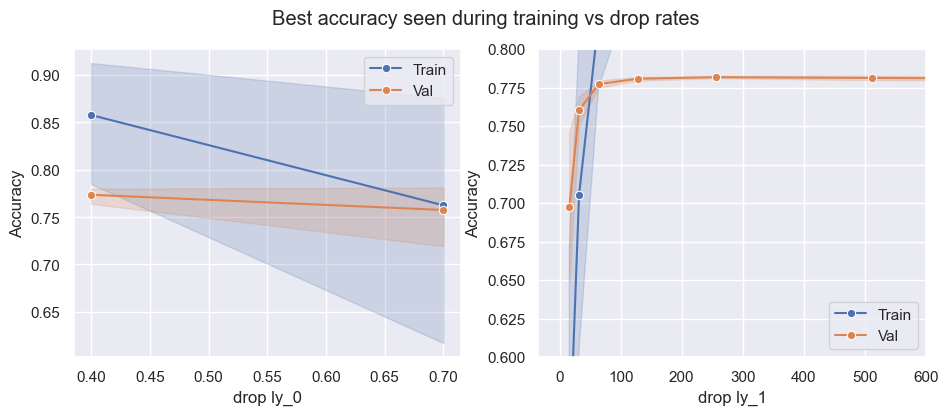

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, axs = plt.subplots(1,2,figsize=(11,4))
fig.suptitle("Best accuracy seen during training vs drop rates")

ax = axs[0]
sns.lineplot(x = drop0, y = best_train_acc, marker = 'o', ax=ax, label = 'Train')
sns.lineplot(x = drop0, y = best_val_acc, marker = 'o', ax=ax, label = 'Val')
ax.set_xlabel("drop ly_0")
ax.set_ylabel("Accuracy")
# ax.set_ylim(0.7,0.8)
ax.legend()

ax = axs[1]
sns.lineplot(x = d1_units, y = best_train_acc, marker = 'o', ax=ax, label = 'Train')
sns.lineplot(x = d1_units, y = best_val_acc, marker = 'o', ax=ax, label = 'Val')
ax.set_xlabel("drop ly_1")
ax.set_ylabel("Accuracy")
ax.set_ylim(0.6,0.8)
ax.set_xlim(xmax=600);

**Training Histories**

In [121]:
# Nepoch = 200
x_epochs = np.arange(1,Nb_epochs+1,1)
train_history = results['train_histories']

(0.75, 0.8)

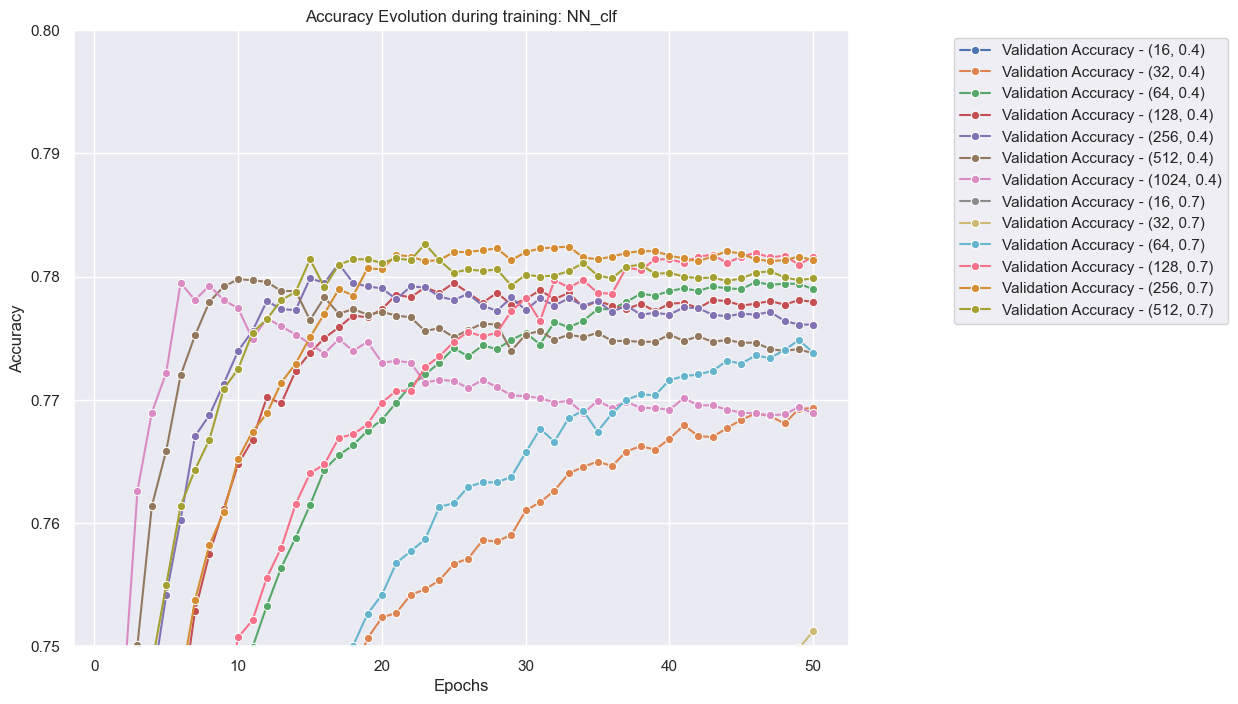

In [127]:
art1 = sns.color_palette()
art2 = sns.color_palette("husl", 9)
art3 = sns.color_palette("flare")
art4 = sns.color_palette("pastel")

art = art1 + art2 + art3 + art4

plt.figure(figsize=(10,8))

for i in range(len(train_history)-1): #len(training_history)
    
    train_acc_hist = train_history[i].history['accuracy']
    val_acc_hist = train_history[i].history['val_accuracy']
    train_loss_hist = train_history[i].history['loss']
    val_loss_hist = train_history[i].history['val_loss']

    hist_params = str(results['param_trained'][i])
    
    
    if val_acc_hist[-1] > 0.0:
        color =  art[i]
    #     sns.lineplot(x = x_epochs, y = train_acc_hist, color = color, ls = ':', label = 'Training Accuracy - ' + hist_params)
        sns.lineplot(x = x_epochs, y = val_acc_hist, color = color, marker = 'o', label = 'Validation Accuracy - ' + hist_params)
#         sns.lineplot(x = x_epochs, y = val_loss_hist, color = color, marker = 'o', label = 'Validation Loss - ' + hist_params)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution during training: NN_clf')
plt.legend(bbox_to_anchor=(1.5, 1.0))#
plt.ylim(0.75,0.8)

**Save data into a formated dataframe**

# Text  Base Models Comparison

In [410]:
micro_rf.set_index('prdtypecode').head()

,precision,recall,f1-score,support
prdtypecode,,,,
10,0.339321,0.545746,0.418462,623.0
40,0.653153,0.577689,0.613108,502.0
50,0.773700,0.752976,0.763198,336.0
60,0.971631,0.825301,0.892508,166.0
1140,0.723592,0.769663,0.745917,534.0


In [409]:
micro_svc.set_index('prdtypecode').head()

,precision,recall,f1-score,support
prdtypecode,,,,
10,0.339321,0.545746,0.418462,623.0
40,0.653153,0.577689,0.613108,502.0
50,0.773700,0.752976,0.763198,336.0
60,0.971631,0.825301,0.892508,166.0
1140,0.723592,0.769663,0.745917,534.0


In [408]:
micro_cr.set_index('prdtypecode').head()

,precision,recall,f1-score,support
prdtypecode,,,,
10,0.345848,0.487961,0.404794,623.0
40,0.593814,0.573705,0.583587,502.0
50,0.787097,0.726190,0.755418,336.0
60,0.922581,0.861446,0.890966,166.0
1140,0.704467,0.767790,0.734767,534.0


## Difference between NN and RF classification report
In classification report, blue means improvement while red means degradation.

Improvements (Blue) or detriments (Red) in NN-model with respect to rf-model


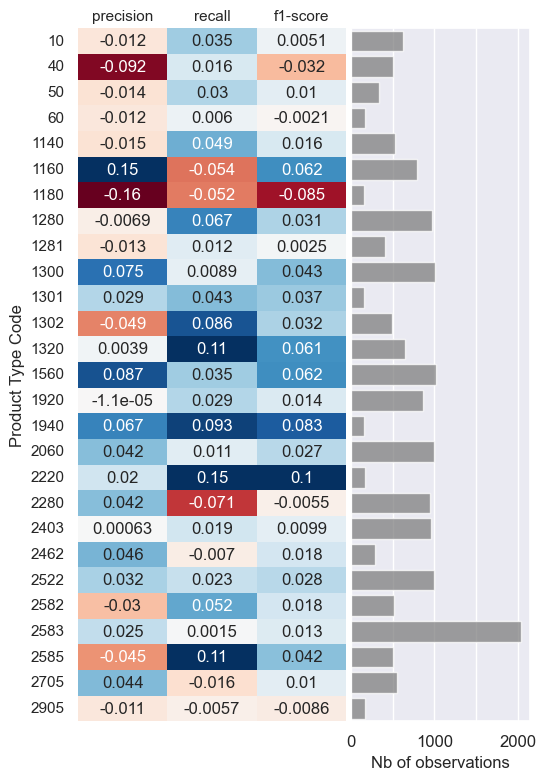

In [419]:
import BaseModel_tools as bm

print("Improvements (Blue) or detriments (Red) in NN-model with respect to rf-model")
tbm.classification_reports_difference(micro_NN, micro_rf)

## Difference between NN and SVC models

Improvements (Blue) or detriments (Red) in NN-model with respect to svc-model


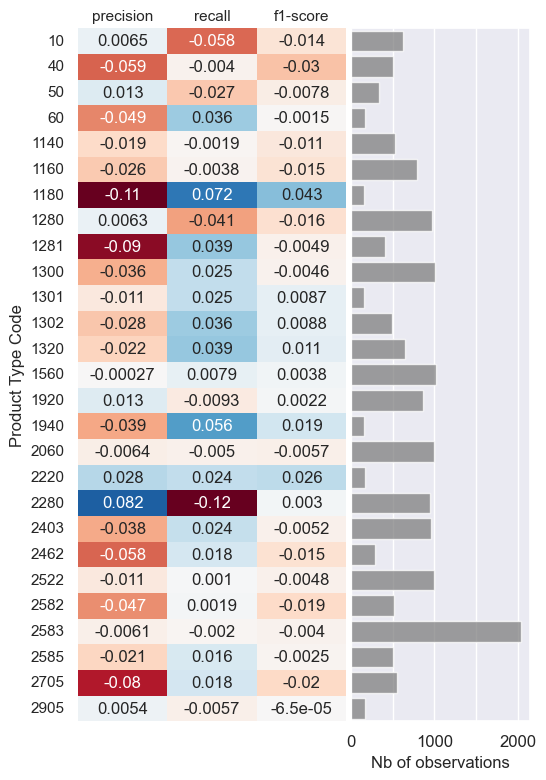

In [420]:
print("Improvements (Blue) or detriments (Red) in NN-model with respect to svc-model")
tbm.classification_reports_difference(micro_NN, micro_svc)

## Difference between SVC and RF classification report

Improvements (Blue) or detriments (Red) in svc-model with respect to rf-model


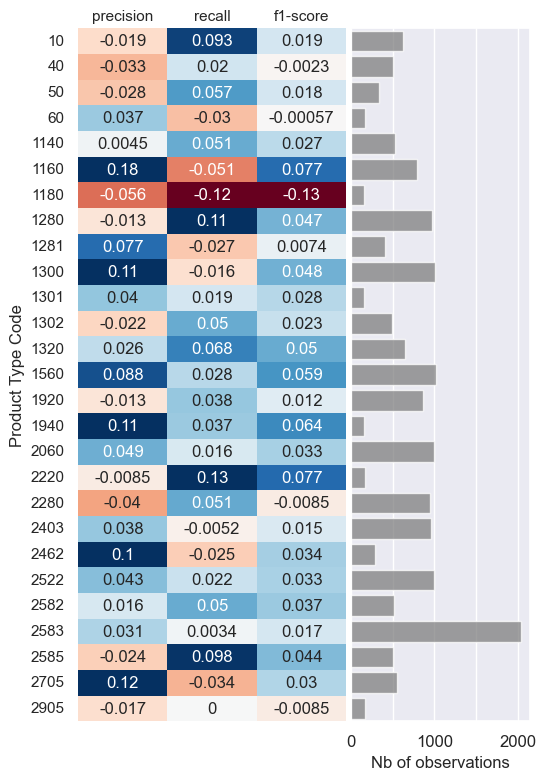

In [422]:
print("Improvements (Blue) or detriments (Red) in svc-model with respect to rf-model")
tbm.classification_reports_difference(micro_svc, micro_rf)

## Model Accuracy & Performance Comparison

In [4]:
base_models = {'models'     : ['RF', 'SVC', 'NN'],
               'train_acc'  : [0.977, 0.868, 0.878],
               'test_acc'   : [0.751, 0.776, 0.773],
               'train_time' : [60.98, 638.71, 52.60],  # seconds
               'predict_time' : [0.32, 161.51, 2.17]}  # seconds

# base_models = {'models'     : ['RF', 'SVC', 'NN','FUSION'],
#                'train_acc'  : [0.977, 0.868, 0.878, 0.937],
#                'test_acc'   : [0.751, 0.776, 0.773, 0.808],
#                'train_time' : [60.98, 638.71, 52.60, 3133.75],  # seconds
#                'predict_time' : [0.32, 161.51, 2.17, 10.59]}  # seconds

text_models_df = pd.DataFrame(base_models)

text_models_df['model_id'] = text_models_df.index + 1

text_models_df

,models,train_acc,test_acc,train_time,predict_time,model_id
0,RF,0.977,0.751,60.98,0.32,1
1,SVC,0.868,0.776,638.71,161.51,2
2,NN,0.878,0.773,52.60,2.17,3


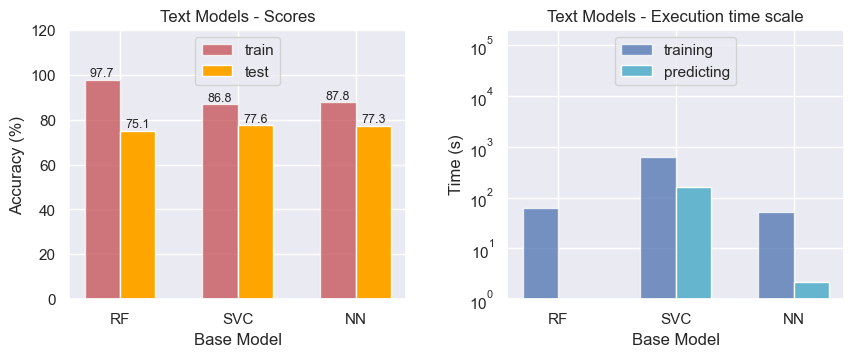

In [8]:
art = sns.color_palette()

barWidth = 0.3
x0 = range(1,len(text_models_df)+1, 1)
x1 = [ x - 0.5*barWidth for x in x0 ]
x2 = [ x + 0.5*barWidth for x in x0 ]

alphas = [0.75, 1.0, 1.0]

fig, axs = plt.subplots(1,2,figsize=(10,3.5), )

# axs[0].bar_label(ax.containers[0], labels = values, label_type='edge', fontsize = 10)
p1 = axs[0].bar(x1, text_models_df['train_acc']*100, width = barWidth, label='train', color = art[3], alpha = 0.75)
p2 = axs[0].bar(x2, text_models_df['test_acc']*100, width = barWidth, label='test', color = 'orange')

label_train = [str(round(val*100,1)) for val in text_models_df['train_acc']] 
label_test = [str(round(val*100,1)) for val in text_models_df['test_acc']] 
axs[0].bar_label(p1, labels = label_train, label_type='edge', fontsize = 9, rotation = 0, padding = 0) #fmt='%.2f'
axs[0].bar_label(p2, labels = label_test, label_type='edge', fontsize = 9, rotation = 0, padding = 0)

axs[0].set_ylabel("Accuracy (%)")
axs[0].set_ylim(0,120)
axs[0].legend(loc = 'upper center')
axs[0].set_title("Text Models - Scores")


axs[1].bar(x1, text_models_df['train_time'], width = barWidth, label='training', color = art[0], alpha = 0.75)
axs[1].bar(x2, text_models_df['predict_time'], width = barWidth, label='predicting', color = art[9])

axs[1].set_ylabel("Time (s)")
axs[1].set_yscale('log')
axs[1].set_ylim(1,2e5)
axs[1].legend(loc = 'upper center')
axs[1].set_title("Text Models - Execution time scale")

for ax in axs:
    ax.set_xlabel("Base Model")
    ax.set_xticks(ticks= range(1,len(text_models_df)+1,1), labels=text_models_df['models'])

plt.subplots_adjust(wspace=0.3, hspace=0)

# plt.savefig('./images/text_models_comparison_all.png', bbox_inches='tight', dpi = 300)
plt.show()